# The Machine Learning Landscape

When most people hear "machine learning", they picture a robot: a dependable butler or a deadly terminator, depending on who you ask. But machine learning is not just a futuristic fantasy, it's already here. Infact, it has been around for decades in some specialised applications, such as *Optical Character Recognition* (OCR). But the first ML application that really became mainstream, improving the lives of hundreds of millions of people, took over the world back in the 1990s -- it was the *spam filter*. Not exactly a self-aware Skynet, but it does technically qualify as machine learning (it's learned so well that you seldom need to flag an email as spam anymore). It was followed by hundreds of ML applications that now quietly power hundred of products & features that you use regularly, from better recommendations to voice search.

Where does machine learning start & where does it end? What exactly does it mean for a machine *learn* something? If I download a copy of Wikipedia, has my computer really "learned" something? Is it suddenly smarter? In this chapter, we will clarify what machine learning is & why we may want to use it. 

Before we explore the machine learning continent, we will take a look at the map & learn about the main regions & the most notable landmarks: supervised versus unsupervised learning, online versus batch learning, instance-based versus model-based learning. Then, we will explore the workflow of a typical ML project, discuss the main challenges you may face, & cover how to evaluate & fine-tune a machine learning system.

This chapter will introduce a lot of fundamental concepts (and jargon) that every data scientist should know by heart. It will be a high-level overview, but you should make sure everything is crystal-clear to you before continuing the rest of the lessons. Let's get started.

---

# What is Machine Learning?

Machine learning is the science (& art) of programming computers so they can *learn from data*.

Here is a slightly more general definition:

*[Machine Learning is the] field of study that gives computers the ability to learn without being explicitly programmed.* - Arthur Samuel, *1959*

A more engineering-oreinted one:

*A computer program is said to learn from experience E with respect to some task T & some performance measure P, if its performance on T, as measured by P, improves with experience E.* - Tom Mitchell, *1997*

For example, your spam filter is a machine learning program that can learn to flag spam given examples of spam emails (e.g. flagged by users) & examples of regular (nonspam, also called "ham") emails. The examples that the system uses to learn are called the *training set*. Each training example is called a *training instance* (or *sample*). In this case, the task T is to flag spam for new emails, the experience E is the *training data*, & the performance measure P needs to be defined; for example, you can use the ratio of correctly classified emails. This particular performance measure is called *accuracy* & it is often used in classification tasks.

If you just download a copy of Wikipedia, your computer has a lot more data, but it is not suddenly better at any task. Thus, it is not machine learning.

---

# Why Use Machine Learning?

Consider how you would write a spam filter using traditional programming techniques.

1. First, you would look at what spam typically looks like. You might notice that some words or phrases (such as "4U", "credit card", "free", & "amazing") tend to come up a lot in the subject. Perhaps you would also notice a few other patterns in the sender's name, the email's body, & so on.
2. You would write a detection algorithm for each of the patterns that you noticed, & your program would flag emails as spam if a number of these patterns are detected. 
3. You would test your program, & repeat steps 1 & 2 until it is good enough.

<img src = "Spam Filter.png" alt = "Alternative text" width = "500" style = "margin:auto"/>

Since the problem is not trivial, your program will likely become a long list of complex rules -- pretty hard to maintain.

In contrast, a spam filter based on machine learning techniques automatically learns which words & phrases are good predictors of spam by detecting unusually frequent patterns of words in the spam examples compared to the ham examples. The program is much shorter, easier to maintain, & most likely more accurate.

<img src = "ML Spam Filter.png" alt = "Alternative text" width = "500" style = "margin:auto"/>

Moreover, if spammers notice that all their emails containing "4U" are blocked, they might start writing "For U" instead. A spam filter using traditional programming techniques would need to be updated to flag "For U" emails. If spammers keep working around your spam filter, you will need to keep writing new rules forever.

<img src = "ML Spam Filter 2.png" alt = "Alternative text" width = "500" style = "margin:auto"/>

Another area where machine learning shines is for problems that either are too complex for traditional approaches or have no known algorithm. For example, consider speech recognition: say you want to start simple & write a program capable of distinguishing the words "one" & "two". You might notice that the word "two" starts with the high-pitch sound ("T"), so you could hardcode the algorithm that measures high-pitch sound intensity & use that to distinguish ones & twos. Obviously, this technique will not scale to thousands of words spoken by millions of very different people in noisy environments & in dozens of languages. The best solution (at least today) is to write an algorithm that learns by itself, given many example recordings for each word.

Finally, machine learning can help humans learn: ML algorithms can be inspected to see what they have learned (although for some algorithms this can be tricky). 

<img src = "ML Spam Filter 3.png" alt = "Alternative text" width = "500" style = "margin:auto"/>

For instance, once the spam filter has been trained on enough spam, it can easily be inspected to reveal the list of words & combinations of words that it believes are the best predictors of spam. Sometimes this will reveal unsuspected correlations or new trends, & thereby lead to a better understanding of the problem.

Applying ML techniques to dig into large amounts of data can help discover patterns that were not immediately apparent. This is called *data mining*.

To summarise, machine learning is great for:

* Problems for which existing solutions require a lot of hand-tuning or long lists of rules: one machine learning algorithm can often simplify code & perform better.
* Complex problems for which there is no good solution at all using a traditional approach: the best machine learning techniques can find a solution.
* Fluctuating environments: a machine learning system can adapt to new data.
* Getting insights about complex problems & large amounts of data.

---

# Types of Machine Learning Systems

There are many different types of machine learning systems that it is useful to classify them in broad categories based on:

* Whether or not they are trained with human supervision (supervised, unsupervised, semisupervised, & reinforcement learning)
* Whether or not they can learn incrementally on the fly (online vs. batch learning)
* Whether they work by simply comparing new data points to known data points, or instead detect patterns in the training data & build a predictive model, much like scientists do (instance-based vs. model-based learning)

These criteria are not exclusive; you can combine them in any way you like. For example, a state-of-the-art spam filter may learn on the fly using a deep neural network model trained using examples of spam & ham; this makes it an online, model-based, supervised learning system. Let's explore these criteria more closely.

## Supervised/Unsupervised Learning

Machine learning systems can be classified according to the amount & type of supervision they get during training. They are four major categories: supervised learning, unsupervised learning, semisupervised learning, & reinforcement learning.

### Supervised Learning

In *supervised learning*, the training data you feed to the algorithm includes the desired solutions, called *labels*.

<img src = "Supervised Learning Classification.png" alt = "Alternative text" width = "500" style = "margin:auto"/>

A typical supervised learning task is *classification*. The spam filter is a good example of this: it is trained with many example emails along with their *class* (spam or ham), & it must learn how to classify new emails. 

Another typical task is to predict a *target* numeric value, such as the price of a car, given a set of *features* (mileage, age, brand, etc.) called *predictors*. This sort of task is called *regression*. To train the system, you need to give it many examples of cars, including both their predictors & their labels (i.e., their prices).

<img src = "Supervised Learning Regression.png" alt = "Alternative text" width = "500" style = "margin:auto"/>

Note that some regression algorithms can be used for classification as well, & vice versa. For example, *logistic regression* is commonly used for classification, as it can output a value that corresponds to the probability of belonging to a given class (e.g., 20% chance of being spam).

Here are some of the most important supervised learning algorithms, the ones we will be covering:

* k-Nearest Neighbors
* Linear Regression
* Logistic Regression
* Support Vector Machines (SVMs)
* Decision Trees & Random Forests
* Neural Networks

### Unsupervised Learning

In *unsupervised learning*, as you might guess, the training data is unlabeled. The system tries to learn without a teacher.

<img src = "Unsupervised Learning.png" alt = "Alternative text" width = "500" style = "margin:auto"/>

Here are some of the most important unsupervised learning algorithms, the ones we will be covering:

* Clustering
   - K-Means
   - DBSCAN
   - Hierarchical Cluster Analysis (HCA)
* Anomaly Detection & Novelty Detection
   - One-class SVM
   - Isolation Forest
* Visualisation & Dimensionality Reduction
   - Principal Component Analysis (PCA)
   - Kernel PCA
   - Locally-Linear Embedding (LLE)
   - t-Distributed Stochastic Neighbour Embedding (t-SNE)
* Association Rule Learning
   - Apriori
   - Eclat
   
For example, say you have a lot of data about your blog's visitors. You may want to run a *clustering* algorithm to try to detect groups of similar vistors. At no point do you tell the algorithm which group a visitor belongs to: it finds those connections without your help. For example, it might notice that 40% of your visitors are males who love comic books & generally read your blog in the evening, while 20% are young sci-fi lovers who visit during the weekends, & so on. If you use a *hierarchical clustering* algorithm, it may also subdivid each group into smaller groups. This may help you target your posts for each group.

<img src = "Unsupervised Learning HCA.png" alt = "Alternative text" width = "500" style = "margin:auto"/>

*Visualisation* algorithms are also good examples of unsupervised learning algorithms: you feed them a lot of complex & unlabeled data, & they output a 2D or 3D representation of your data that can easily be plotted. These algorithms try to preserve as much structure as they can (e.g., trying to keep separate clusters in the input space from overlapping in the visualisation), so you can understand how the data is organised & perhaps identify unsuspected patterns.

<img src = "Unsupervised Learning t-SNE.png" alt = "Alternative text" width = "500" style = "margin:auto"/>

A related task is *dimensionality reduction*, in which the goal is to simplify the data without losing too much information. One way to do this is to merge several correlated features into one. For example, a car's mileage may be very correlated with its age, so the dimensionality reduction algorithm will merge them into one feature that represents the car's wear & tear. This is called *feature extraction*.

Yet another important unsupervised task is *anomaly detection* -- for example, detecting unusually credit card transactions to prevent fraud, catching manufacturing defects or automatically removing outliers from a dataset before feeding it to another learning algorithm. The system is shown mostly normal instance during training, so it learns to recognise them & when it sees a new instance it can tell whether it looks like a normal or whether it is likely an anomaly. A very similar task is *novelty detection*: the difference is that novelty detection algorithms expect to see only normal data during training, while anomaly detection algorithm are usually more tolerant, they can often perform well even with a small percentage of outliers in the training set.

<img src = "Unsupervised Learning Anomaly Detection.png" alt = "Alternative text" width = "500" style = "margin:auto"/>

Finally, another common unsupervised task is *association rule learning*, in which the goal is to dig into large amounts of data & discover interesting relations between attributes. For example, suppose you own a supermarket. Running an association rule on your sales logs may reveal that people who purchase barbecue sauce & potato chips also tend to buy steak. Thus, you may want to place these items close to each other.

### Semisupervised Learning

Some algorithms can deal with partially labeled training data, usually a lot of unlabeld data & a little bit of labeld data. This is called *semisupervised learning*.

Some photo-hosting services, such as Google Photos, are good examples of this. Once you upload all of your family photos to the service, it automatically recognises that the same person A shows up in photos 1, 5, & 11, while another person B shows up in photos 2, 5, & 7. This is the unsupervised part of the algorithm (clustering). Now all the system needs is for you to tell it who these people are. Just one label per person, & it is able to name everyone in every photo, which is useful for searching photos.

<img src = "Semisupervised Learning.png" alt = "Alternative text" width = "500" style = "margin:auto"/>

Most semisupervised learning algorithms are combinations of unsupervised & supervised algorithms. For example, *deep belief networks* (DBNs) are based on unsupervised components called *restricted Boltzmann machines* (RBMs) stacked on top of one another. RBMs are trained sequentially in a unsupervised manner, & then the whole system is fine-tuned using supervised learning techniques.

### Reinforcement Learning

*Reinforcement learning* is a different beast. The learning system, called an *agent* in this context, can observe the environment, select & perform actions, & get *rewards* in return (or *penalties* in the form of negative rewards). It must then learn by itself what is the best strategy, called a *policy*, to get the most reward over time. A policy defines what action the agent should choose when it is in a given situation.

<img src = "Reinforcement Learning.png" alt = "Alternative text" width = "500" style = "margin:auto"/>

For example, many robots implement reinforcement learning algorithms to learn how to walk. DeepMind's AlphaGo program is also a good example of reinforcement learning: it made the headlines in May 2017 when it beat the world champion Ke Jie at the game of *Go*. It learned its winning policy by analyzing millions of games, & then playing many games against itself. Note that learning was turned off during the games against the champion; AlphaGo was just applying the policy it had learned.

## Batch & Online Learning

Another criterion used to classify machine learning systems is whether or not the system can learn incrementally from a stream of incoming data.

### Batch Learning

In *batch learning*, the system is incapable of learning incrementally: it must be trained using all the available data. This will generally take a lot of time & computing resources, so it is typically done offline. First the system is trained, & then it is launched into production & runs without learning anymore; it just applies what it has learned. This is called *offline learning*.

If you want a batch learning system to know about new data (such as a new type of spam), you need to train a new version of the system from scratch on the full dataset (not just the new data, but also the old data), then stop the old system & replace it with the new one. 

Fortunately, the whole process of training, evaluating, & launching a machine learning system can be automated fairly easily, so even a batch learning system can adapt to change. Simply update the data * train a new version of the system from scratch as often as needed.

This solution is simple & often works fine, but training using the full set of data can take many hours, so you would typically train a new system only every 24 hours or even just weekly. If your system needs to adapt to rapidly changing data (e.g., to predict stock prices), then you need a more reactive solution.

Also, training on the full set of data requires a lot of computing resources (CPU, memory space, disk space, disk I/O, network I/O, etc.). If you have a lot of data & you automate your system to train from scratch every day, it will end up costing you a lot of money. If the amount of data is huge, it may even be impossible to use a batch learning algorithm.

Finally, if your system needs to be able to learn autonomously & it has limited resources (e.g., a smartphone application or a rover on Mars), then carrying around large amounts of training data & taking up a lot of resources to train for hours every day is a showstopper.

Fortunately, a better option in all these cases is to use algorithms that are capable of learning incrementally.

### Online Learning

In *online learning*, you train the system incrementally by feeding it data instances sequentially, either individually or by small groups called *mini-batches*. Each learning step is fast & cheap, so the system can learn about new data on the fly, as it arrives.

<img src = "Online Learning.png" alt = "Alternative text" width = "500" style = "margin:auto"/>

Online learning is great for systems that receive data as a continuous flow (e.g., stock prices) & need to adapt to hange rapidly or autonomously. It is also a good option if you have limited computing resources: once an online learning system has learned about new data instances, it does not need them anymore, so you can discard them (unless you want to be able to roll back to a previous state & "replay" the data). This can save a huge amount of space.

<img src = "Online Learning 2.png" alt = "Alternative text" width = "500" style = "margin:auto"/>

One important parameter of online learning systems is how fast they should adapt to changing data: this is called the *learning rate*. If you set a high learning rate, then your system will rapidly adapt to new data, but it will also tend to quickly forget the old data (you don't want to spam filter to flag only the latest kinds of spam it was shown). Conversely, if you set a low learning rate, the system will have more inertia; that is, it will learn more slowly, but it will also be less sensitive to noise in the new data or to sequences of nonrepresentative data points (outliers).

A big challenge with online learning is that if bad data is fed to the system, the system's performance will gradually decline. If we are talking about a live system, your clients will notice. For example, bad data could come from a malfunctioning sensor on a robot, or from someone spamming the search engine to try to rank high in search results. To reduce this risk, you need to monitor your system closely & promptly switch learning off (& possibly revert to a previously working state) if you detect a drop in performance. You may also want to monitor the input data & react to abnormal data (e.g., using a anomaly detection algorithm).

## Instance-Based Vs. Model-Based Learning

One more way to categorise machine learning systems is by how they *generalise*. Most machine learning tasks are about making predictions. This means that given a number of training examples, the system needs to be able to generalise to examples it has never seen before. Having a good performance measure on the training data is good, but insufficient; the true goal is to perform well on new instances.

There are two main approaches to generalisation: instance-based learning & model-based learning.

### Instance-Based Learning

Possibly the most trivial form of learning is to simply learn by heart. If you were to create a spam filter this way, it would just flag all emails that are identical to emails that have already been flagged by users -- not the worst solution, but certainly not the best.

Instead of just flagging emails that are identical to known spam emails, your spam filter could be programmed to also flag emails that are very similar to known spam emails. This require a *measure of similarity* between two emails. A (very basic) similarity measure between two emails could be to count the number of words they have in common. The system would flag an email as spam if it has many words in common with a known spam email.

This is called *instance-based learning*: the system learns the examples of the heart, then generalises to new cases by comparing them to the learned examples (or a subset of them), using a similarity measure. For example, in the below figure, the new instance would be classified as a triangle because the majority of the most similar instances belong to that class.

<img src = "Instance-Based Learning.png" alt = "Alternate text" width = "500" style = "margin:auto"/>

### Model Based Learning

Another way to generalise from a set of examples to build a model of these examples, the use that model to make *predictions*. This is called *model-based learning*.

<img src = "Model-Based Learning.png" alt = "Alternative text" width = "500" style = "margin:auto"/>

For example, suppose you want to know if money makes people happy, so you download the *Better Life Index* data from the OECD's website as well as states about GDP per capita from the IMF's website. Then you join the tables & sort by GDP per capita. 

<img src = "Life Satisfaction vs GDP per Capita.png" alt = "Alternative text" width = "300" style = "margin:auto"/>
<img src = "Life Satisfaction vs GDP per Capita 2.png" alt = "Alternative text" width = "500" style = "margin:auto"/>

There does seem to be a trend here. Although the data is *noisy* (i.e., partly random), it looks like life satisfaction goes up more or less linearly as the country's GDP per capita increases. So you decide to model life satisfaction as a linear function of GDP per capita. This step is called *model selection*: you selected a *linear model* of life satisfaction with just one attribute, GDP per capita.

$${life\_satisfaction} = \theta_0 + \theta_1 * {GDP\_per\_capita}$$

This model has two *model parameters*, $\theta_0$, & $\theta_1$. By tweaking these parameters, you can make your model represent any linear function as shown in the below figure.

<img src = "Linear Model.png" alt = "Alternative text" width = "500" style = "margin:auto"/>

Before you can use your model, you need to define the parameter values $\theta_0$ & $\theta_1$. How can you know which values will make your models perform best? To answer this question, you need to specify a performance measure. You can either define a *utility function* (or *fitness function*) that measures how *good* your model is, or you can define a *cost function* that measures how *bad* it is. For linear regression problems, people typically use a cost function that measures the distance between the linear model's predictions & the training examples; the objective is to minimise this distance.

This is where the linear regression algorithm comes in: you feed it your training examples & it finds the parameters that make the linear model fit best to your data. This is called *training* the model. In our case, the algorithm finds that the optimal parameter values are $\theta_0 = 4.85$ & $\theta_1 = 4.95 * 10^{-5}$.

Now the model fits the training data as closely as possible (for a linear model), as you can see in the below figure.

<img src = "Linear Model 2.png" alt = "Alternative text" width = "500" style = "margin:auto"/>

You are finally ready to run the model to make predictions. For example, say you want to know how happy Cypriots are, & the OECD data does not have the answer. Fortunately, you can use your model to make a good predictions: you look up Cyprus's GDP per capita, find 22,587, & then apply your model & find that life satisfaction is likely to be somewhere around $4.85 + 22,587 * 491 * 10^{-5} = 5.96$.

To whet you appetite, below is Python code that loads the data, prepares it, creates a scatterplot for visualisation, & then trains a linear model & makes a prediction.

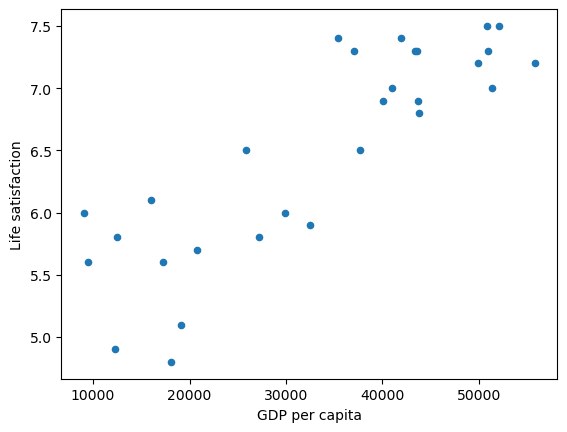

[[5.96242338]]


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

# Load the data.
oecd_bli = pd.read_csv("oecd_bli_2015.csv", thousands = ",")
gdp_per_capita = pd.read_csv("gdp_per_capita.csv", thousands = ",", delimiter = "\t", encoding = "latin1", na_values = "n/a")

# Prepare the data.
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]                                                                 
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

# Visualise the data.
country_stats.plot(kind = "scatter", x = "GDP per capita", y = "Life satisfaction")
plt.show()

# Select a linear model.
model = sklearn.linear_model.LinearRegression()

# Train the model.
model.fit(X, y)

# Make a prediction for Cyprus.
X_new = [[22587]] # Cyprus' GDP per capita
print(model.predict(X_new)) # output

If all went well, your model will make good predictions. If not, you may need to use more attributes (employment rate, health, air pollution, etc.), get more or better quality training data, or perhaps select a more powerful model (e.g., a polynomial regression model).

In summary:

* You studied the data.
* You selected a model.
* You trained it on the training data (i.e., the learning algorithm searched for the model parameter values that minimise a cost function).
* Finally, you applied the model to make predictions on new cases (this is called *inference*), hoping that this model will generalise well.

This is what a typical machine learning project looks like. In further chapters, you will expereince this first-hand by going through an end-to-end project.

We have covered a lot of ground so far: you now know what machine learning is really about, why it is useful, what some of the most common categories of ML systems are, & what a typical project workflow looks like. Now let's lookat what can go wrong in learning & preventing you from making accurate predictions.

---

# Main Challenges of Machine Learning

In short, since your main task is to select a learning algorithm & train it on some data, the two things that can go wrong are "bad algorithm" or "bad data". Let's start with examples of bad data.

## Insufficient Quantity of Training Data

For a toddler to learn what an apple is, all it takes is for you to point to an apple & say "apple" (possibly repeating this procedure a few times). Now the child is able to recognise apples in all sorts of colours & shapes. Genius.

Machine learning is not quite yet; it takes a lot of data for most machine learning algorithms to work properly. Even for very simple problems you typically need thousands of examples, & for complex problems such as image or speech recognition you may need millions of examples (unless you can reuse parts of an existing model).

<img src = "Data in Algorithms.png" alt = "Alternative text" width = "500" style = "margin:auto"/>

## Nonrepresentative Training Data

In order to generalise well, it is crucial that your training data be representative of the new cases you want to generalise to. This is true whether you use instances-based learning or model-based learning.

For example, the set of countries we used earlier for training the linear model was not perfectly representative; a few countries were missing. The below figure shows what the data looks like when you add the mising countries.

<img src = "Nonrepresentative Training Data.png" alt = "Alternative text" width = "500" style = "margin:auto"/>

If you train a linear model on this data, you get the solid line, while the old model is represented by the dotted line. As you can see, not only does adding a few missing countries significantly alter the model, but it makes it clear that such a simple linear model is probably never going to work well. It seems that very rich countries are not happier than moderately rich countries (in fact they seem unhappier), & conversely some poor countries seem happier than many rich countries.

By using a nonrepresentative training set, we trained a model that is unlikely to make accurate predictions, especially for very poor & very rich countries.

It is crucial to use a training set that is representative of the cases you want to generalise to. This is often harder than it sounds: if the sample is too small, you will have *sampling noise* (i.e., nonrepresentative data as a result of chance), but even very large samples can be nonrepresentative if the sampling method is flawed. This is called *sampling bias*.

## Poor-Quality Data

Obviously, if your training data is full of errors, outliers, & noise (e.g., due to poor-quality measurements), it will make it harder for the system to detect the underlying patterns, so your system is less likely to perform well. It is often well worth the effort to spend time cleaning up your training data. The truth is, most data scientists spend a significant part of their time doing just that. For example:

* If some instances are clearly outliers, it may help to simply discard them or try to fix the errors manually.
* If some instances are missing a few features (e.g., 5% of your customers did not specify their age), you must decide whether you want to ignore this attribute altogether, ignore these instances, fill in the missing values (e.g., with the median age), or train one model with the feature & one model without it, & so on.

## Irrelevant Features

As the saying goes: garbage in, garbage out. Your system will only be capable of learning if the training data contains enough relevant features & not too many irrelevant ones. A critical part of the success of a machine learning project is coming up with a good set of features to train on. This process, called *feature engineering*, involves:

* *Feature selection*: selecting the most useful features to train on among existing features.
* *Feature extraction*: combining existing features to produce a more useful one.
* Creating new features by gathering new data.

Now that we have looked at many examples of bad data, let's look at a couple of examples of bad algorithms.

## Overfitting the Training Data

Say you are visiting a foreign country & the taxi driver rips you off. You might be tempted to say *all* taxi drivers in that country are thieves. Overgeneralising is something that we humans do all too often, & unfortunately machines can fall into the same trap if we are not careful. In machine learning, this is called *overfitting*: it means that the model performs well on the training data, but it does not generalise well.

The below figure shows an example of a high-degree polynomial life satisfaction model that strongly overfits the training data. Even though it performs much better on the training data than the simple linear model, would we really trust its predictions?

<img src = "Overfit Data.png" alt = "Alternative text" width = "500" style = "margin:auto"/>

Complex models such as deep neural networks can detect subtle patterns in the data, but if the training set is noisy, or if it is too small (which introduces sampling noise), then the model is likely to detect patterns in the noise itself. Obviously these patterns will not generalise to new instances. For example, say you feed your life satisfaction model many more attributes, including uninformative ones such as the country's name. In that case, a complex model may detect patterns like the fact that all countries in the training data with a *w* in their name have a life satisfaction greater than 7: New Zealand (7.3), Norway (7.4), Sweden (7.2), & Switzerland (7.5). How confident are you that the W-satisfaction rule generalises to Rwanda or Zimbabwe? Obviously this pattern occurred in the training data by pure chance, but the model has no way to tell whether a pattern is real or simply the result of noise in the data.

Constraining a model to make it simpler & reduce the risk of overfitting is called *regularisation*. For example, the linear model we defined earlier has two parameters $\theta_0$ & $\theta_1$. This gives the learning algorithm two *degrees of freedom* to adpt the model to the training data: it can tweak both the height ($\theta_0$) & the slope ($\theta_1$) of the line. If we forced $\theta_1 = 0$, the algorithm would have only one degree of freedom & would have a much harder time fitting the data properly: all it could do is move the line up or down to get as close as possible to the training instances, so it would end up around the mean. A very simple model indeed! If we allow the algorithm to modify $\theta_1$ but we force to keep it small, then the learning algorithm will effectively have somewhere in between one & two degrees of freedom. It will produce a simpler model than with two degrees of freedom, but more complex than with just one. You want to find the right balance between fitting the training data perfectly & keeping the model simple enoguh to ensure it will generalise well.

The below figure shows three models: the dotted line represents the original model that was trained with a few countries missing, the dashed line is our second model trained with all countries, & the solid line is a linear model trained with the same data as the first model but with a regularisation constraint. You can see that regularisation forced the model to have a smaller slope, which fits a bit less the training data that the model was trained on, but actually allows it to generalise better to new examples.

<img src = "Regularisation.png" alt = "Alternative text" width = "500" style = "margin:auto"/>

The amount of regularisation to apply during learning can be controlled by a *hyper-parameter*. A hyperparameter is a parameter of a learning algorithm (not of the model). As such, it is not affected by the learning algorithm itself; it must be set prior to training & remains constant during training. If you set the regularisation hyperparameter to a very large value, you will get an almost flat model (a slope close to zero); the learning algorithm will almost certainly not overfit the training data, but it will be less likely to find a good solution. Tuning hyperparameters is an important part of building a machine learning system.

## Underfitting the Training Data

As you might guess, *underfitting* is the opposite of overfitting: it occurs when your model is to osimple to learn the underlying structure of the data. For example, a linear model of life satisfaction is prone to underfit; reality is just more complex than the model, so its predictions are bound to be inaccurate, even on the training examples.

The main options to fix this problem are:

* Selecting a more powerful model, with more parameters
* Feeding better featurse to the learning algorithm (feature engineering)
* Reducing the constraints on the model (e.g., reducing the regularisation hyperparameter)

## Stepping Back

By now, you already know a lot about machine learning. However, we went through so many concepts that you may be feeling a little lost, so let's step back & look at the big picture:

* Machine learning is about making machines get better at some task by learning from data, instead of having to explicitly code rules.
* There are many different types of ML systems: supervised or not, batch or online, instance-based or model-based, & so on.
* In a ML project, you gather data in a training set, & you feed the training set to a learning algorithm. If the algorithm is model-based, it tunes some parameters to fit the model to the training set (i.e., to make good predictions on the training set itself), & then hopefully it will be able to make good predictions on new cases as well. If the algorithm is instance-based, it just learns the examples by heart & generalises to new instances by comparing them to the learned instances using a simlarity measure.
* The system will not perform well if your training set is too small, or if the data is not representative, noisy, or polluted with irrelevant features (garbage in, garbage out). Lastly, your model needs to be neither too simple (in which case it will underfit) nor too complex (in which case it will overfit).

There's just one last important topic to cover: once you have trained a model, you don't want to just "hope" it generalises to new cases. You want to evaluate it, & fine-tune it if necessary. Let's see how.

---

# Testing & Validating

The only way to know how well a model will generalise to new cases is to actually try it out on new cases. One way to do that is to put your model in production & monitor how well it performs. This works well, but if your model is horribly bad, your users will complain -- not the best idea.

A better option is to split your data into two sets: the *training set* & the *test set*. As these names imply, you train your model using the training set, & you test it using the test set. The error rate on new cases is called the *generalisation error* (or *out-of-sample error*), & by evaluating your model on the test set, you get an estimate of this error. This value tells you how well your model will perform on instances it has never seen before.

If the training error is low (i.e., your model makes few mistakes on the training set) but the generalisation error is high, it means that your model is overfitting the train data.

## Hyperparameter Tuning & Model Selection

So evaluating a model is simple enough: just use a test set. Now suppose you are hesitating between two model (say a linear model & a polynomial model). How can you decide? One option is to train both & compare how well they generalise using the test set.

Now, suppose that the linear model generalises better, but you want to apply some regularisation to avoid overfitting. The question is: how do you choose the value of the regularisation hyperparameter? One option is to train 100 different models using 100 different values for this hyperparameter. Suppose you find the best hyperparameter value that produces a model with the lowest generalisation error, say just 5% error.

So you launch this model into production, but unfortunately it does not perform as well as expected & produces 15% errors. What happened?

The problem is that you measured the generalisation error multiple times on the test set, & you adapted the model & hyperparameters to produce the best model *for that particular set*. This means that the model is unlikely to perform as well on new data.

A common solution to this problem is called *holdout validation*: you simply hold out part of the training set to evaluate several candidate models & select the best one. The new heldout set is called the *validation set* (also called *development set*). More specifically, you train multiple models with various hyperparameters on the reduced training set (i.e., the full training set minus the validation set), & you select the model that performs best on the validation set. After this holdout validation process, you train the best model on the full training set (including the validation set), & this gives you the final model. Lastly, you evaluate this final model on the test set to get an estimate of the generalisation error.

This solution usually works quite well. However, if the validation set is too small, then model evaluations will be imprecise: you may end up selecting a suboptimal model by mistake. Conversely, if the validation set is too large, then the remaining training set will be much smaller than the full training set. Why is this bad? Well, since the final model will be trained on the full training set, it is not ideal to compare candidate models trained on a much smaller training set. It would be like selecting the fastest sprinter to participate in a marathon. One way to solve this problem is to perform repeated *cross-validation*, using many small validation sets. Each model is evaluated once per validation set, after it is trained on the rest of the data. By averaging out all the evaluations of a model, we get a much more accurate measure of its performance. However, there is a drawback: the training time is multiplied by the number of validation sets.

## Data Mismatch

In some cases, it is easy to get a large amount of data for training, but it is not perfectly representative of the data that will be used in production. For example, suppose you want to create a mobile app to take pictures of flowers & automatically determine their species. You can easily download millions of pictures of flowers on the web, but they won't be perfectly representative of the pictures that will actually be taken using the app on a mobile device. Perhaps you only have 10,000 representative pictures (i.e., actually taken with the app). In this case, the most important rule to remember is that the validation set & the test set must be as representative as possible of the data you expect to use in production, so they should be composed exclusively of representative pictures: you can shuffle them & put half in the validation set, & half in the test set (making sure that no duplicates or near-duplicates end up in both sets). After training your model on the web pictures, if you observe that the performance of your model on the validation set is disappointing, you will not know whether this is because your model has overfit the training set, or whether this is just due to the mismatch between the web pictures & the mobile app pictures. One solution is to hold out part of the training pictures (from the web) in yet another set called the *train-dev set*. After the model is trained (on the training set, *not* on the train-dev set), you can evaluate it on the train-dev set. If it performs well, then the model is not overfitting the training set, so if performs poorly on the validation set, the problem must come from the data mismatch. You can try to tackle this problem by preprocessing the web images to make them look more like the pictures that will be taken by the mobile app, & then retraining the model. Conversely, if the model performs poorly on the train-dev set, then the model must have overfit the training set, so you should try to simplify or regularise the model, get more training data & clean up the training data, as discussed earlier.